In [52]:
#basic imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,mean_absolute_error,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,LinearRegression
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostClassifier,CatBoostRegressor
from xgboost import XGBClassifier,XGBRegressor
import warnings

In [53]:
df=pd.read_csv('studentsperformancs.csv')

In [54]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing X and Y variable

In [55]:
x=df.drop(columns=['math score'],axis=1)

In [56]:
y=df['math score']

In [58]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [59]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [60]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns


from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
        
    ]
)

In [61]:
x.shape

(1000, 7)

In [62]:
x=preprocessor.fit_transform(x)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Create an Evaluate Function to give all metrics after model training

In [64]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [65]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),  # ✅ fixed name
    "Random Forest Regressor": RandomForestRegressor(),  # ✅ fixed typo
    "XGB Regressor": XGBRegressor(),
    # "CatBoost Regressor": CatBoostRegressor(verbose=0),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(models)):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]

    model.fit(X_train, y_train)
    
    # 🔹 Generate predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # 🔹 Evaluate predictions
    y_train_mae, y_train_mse, y_train_rmse, y_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # 🔹 Save model name and R2 score
    model_list.append(model_name)
    r2_list.append(model_test_r2)

    # 🔹 Print results
    print(f"{model_name}:")
    print('Model performance on train data:')
    print(f"Root Mean Square Error: {y_train_rmse:,.4f}")
    print(f"Mean Absolute Error:    {y_train_mae:,.4f}")
    print(f"R2 Score:               {y_train_r2:.4f}")
    
    print("-" * 30)
    print('Model performance on test data:')
    print(f"Root Mean Square Error: {model_test_rmse:,.4f}")
    print(f"Mean Absolute Error:    {model_test_mae:,.4f}")
    print(f"R2 Score:               {model_test_r2:.4f}")
    print("=" * 35)
    print()

Linear Regression:
Model performance on train data:
Root Mean Square Error: 5.3231
Mean Absolute Error:    4.2667
R2 Score:               0.8743
------------------------------
Model performance on test data:
Root Mean Square Error: 5.3940
Mean Absolute Error:    4.2148
R2 Score:               0.8804

Lasso:
Model performance on train data:
Root Mean Square Error: 6.5938
Mean Absolute Error:    5.2063
R2 Score:               0.8071
------------------------------
Model performance on test data:
Root Mean Square Error: 6.5197
Mean Absolute Error:    5.1579
R2 Score:               0.8253

Ridge:
Model performance on train data:
Root Mean Square Error: 5.3233
Mean Absolute Error:    4.2650
R2 Score:               0.8743
------------------------------
Model performance on test data:
Root Mean Square Error: 5.3904
Mean Absolute Error:    4.2111
R2 Score:               0.8806

K-Neighbors Regressor:
Model performance on train data:
Root Mean Square Error: 5.7091
Mean Absolute Error:    4.5175


# Result

In [66]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['model name', 'r2 score']).sort_values(by=['r2 score'], ascending=False) 

,model name,r2 score
2,Ridge,0.880593
0,Linear Regression,0.880433
4,Random Forest Regressor,0.856162
6,AdaBoost Regressor,0.849958
5,XGB Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497


# Linear Regression

In [67]:
linear_model = LinearRegression(fit_intercept=True)
linear_model= linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_test)
score =r2_score(y_test, y_train_pred)*100
print("R2 score of linear regression model is %.2f"%score)

R2 score of linear regression model is 88.04


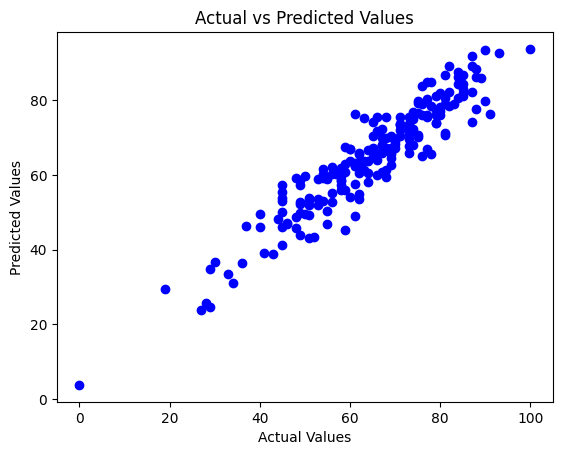

In [68]:
plt.scatter(y_test, y_train_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<Axes: xlabel='math score'>

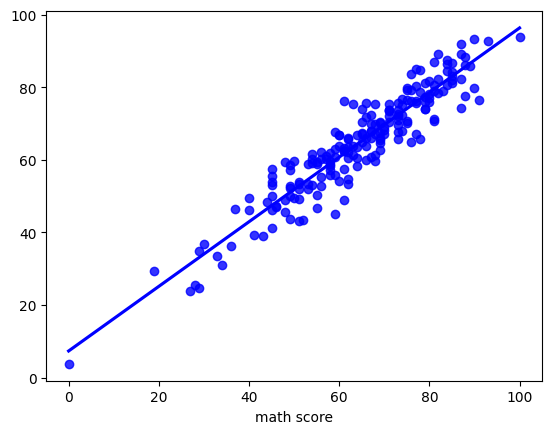

In [69]:
sns.regplot(x=y_test, y=y_train_pred, ci=None, color='blue')

# Difference between Actual and Predicted Values

In [70]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_train_pred , 'difference': y_test - y_train_pred})
predictions.head(10)

,Actual,Predicted,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
678,81,79.014024,1.985976
626,69,64.654609,4.345391
513,54,53.007919,0.992081
859,87,74.184710,12.815290
136,51,49.213538,1.786462


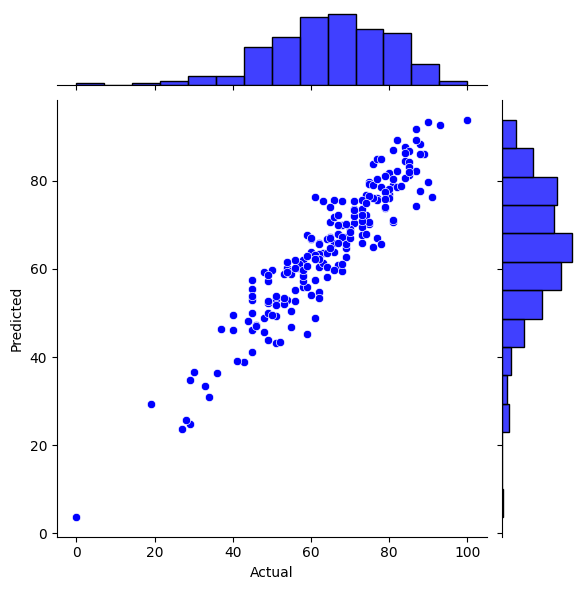

In [75]:
sns.jointplot(x=predictions['Actual'], y=predictions['Predicted'], kind='scatter', color='blue')

<Axes: xlabel='Actual', ylabel='difference'>

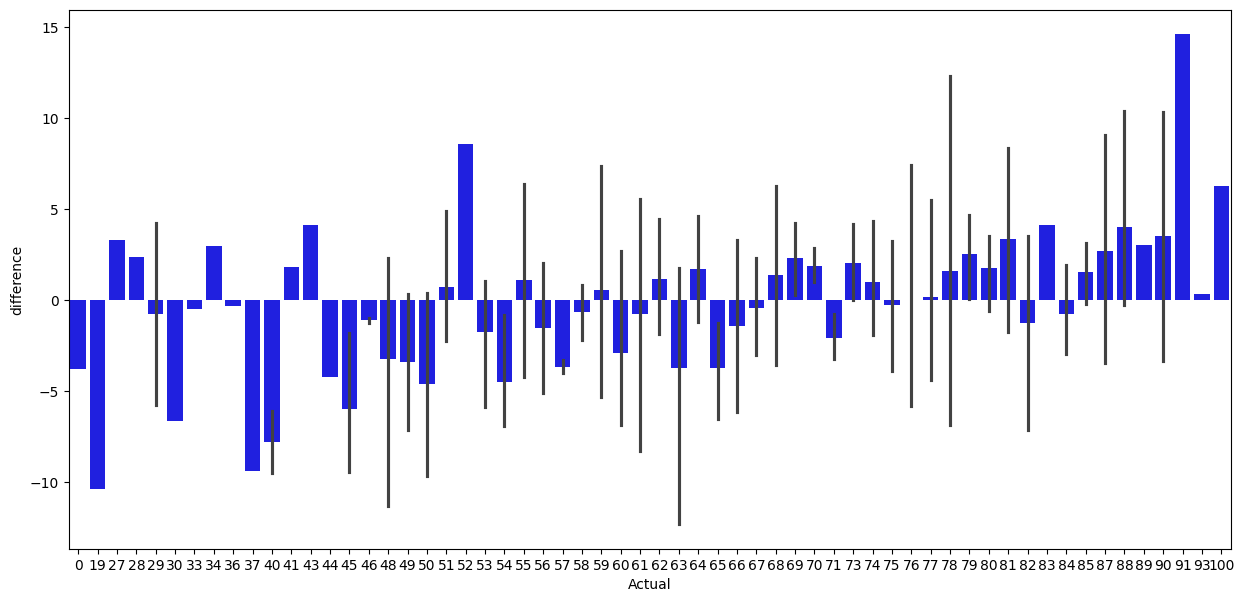

In [77]:
fig=plt.figure(figsize=(15, 7))
sns.barplot(x=predictions['Actual'], y=predictions['difference'], color='blue')

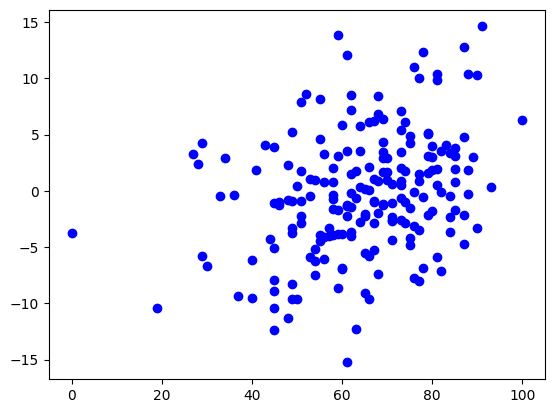

In [79]:
plt.plot(predictions['Actual'], predictions['difference'], 'o', color='blue')